# 컬러 이미지를 분류하는 DNN 구현

### 순서
- CIFAR-10 데이터 소개 
- 데이터 가져오기
- DNN 모델링
- 학습 효과 분석 준비
- DNN 학습 및 성능평가

* CIFAR-10 데이터셋은 10가지 사물이 담긴 컬러 이미지이며 총 6만장 (5만장은 학습용, 1만 장은 평가용) 으로 구성됨. 사진 크기는 32 x 32임

아래 URL을 이용해서 다운이 가능함
Link: http://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
# 데이터 가져오기
import numpy as np
from keras import datasets
from keras.utils import np_utils

def data_func():
# cifar10 -> 10가지 클래스로 구성된 데이터셋
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    L, H, W, C = x_train.shape
    # L: 데이터수, H: 높이, W: 너비, C: 이미지 채널 수
    x_train = x_train.reshape(-1, H * W * C)
    x_test = x_test.reshape(-1, H * W * C)
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    return (x_train, y_train), (x_test, y_test)

In [2]:
# DNN 모델링
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Pd_1, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_1[0], activation='relu', input_shape=(Nin,), name = 'Hidden-1'))
        self.add(layers.Dropout(Pd_1[0]))
        
        self.add(layers.Dense(Nh_1[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(Pd_1[1]))
        
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt 

# 학습 및 성능 평가를 위한 파트
Nh_1 = [100, 50]
Pd_1 = [0.0, 0.0]
number_of_class = 10
Nout = number_of_class

(x_train, y_train), (x_test, y_test) = data_func()
model = DNN(x_train.shape[1], Nh_1, Pd_1, Nout)

history = model.fit(x_train, y_train, epochs=40, batch_size=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 3s 70us/step - loss: 1.9214 - accuracy: 0.3083 - val_loss: 1.8644 - val_accuracy: 0.3382
Epoch 2/40
40000/40000 [==============================] - 3s 66us/step - loss: 1.7534 - accuracy: 0.3780 - val_loss: 1.7154 - val_accuracy: 0.3967
Epoch 3/40
40000/40000 [==============================] - 3s 65us/step - loss: 1.6920 - accuracy: 0.3973 - val_loss: 1.6862 - val_accuracy: 0.4047
Epoch 4/40
40000/40000 [==============================] - 3s 64us/step - loss: 1.6323 - accuracy: 0.4222 - val_loss: 1.6584 - val_accuracy: 0.4125
Epoch 5/40
40000/40000 [==============================] - 3s 64us/step - loss: 1.5978 - accuracy: 0.4317 - val_loss: 1.6727 - val_accuracy: 0.4069
Epoch 6/40
40000/40000 [==============================] - 3s 65us/step - loss: 1.5706 - accuracy: 0.4408 - val_loss: 1.6309 - val_accuracy: 0.4196
Epoch 7/40
40000/40000 [==============================] - 3s 66us/st

10000/10000 [==============================] - 0s 26us/step
Test Loss and Accuracy -> [1.495331734418869, 0.46880000829696655]


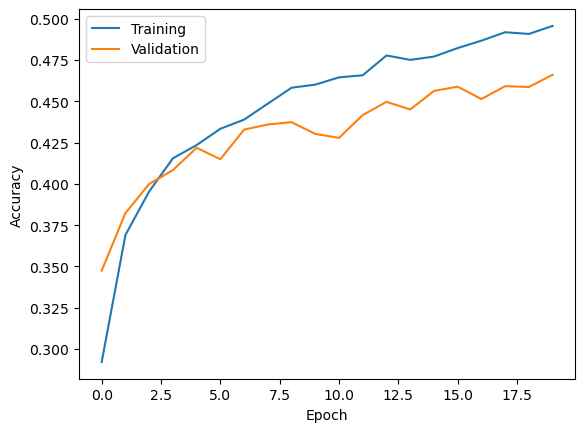

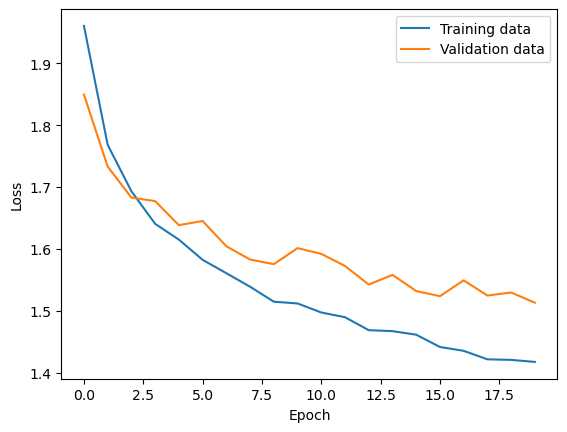

In [8]:
performance_test = model.evaluate(x_test, y_test, batch_size = 100)
print('Test Loss and Accuracy ->', performance_test)

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()